In [25]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def load_images(directory):
    images = []
    for filename in sorted(os.listdir(directory)):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            if img is not None:
                images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return images

In [27]:
def resize_images(images, target_size=(512, 512)):
    return [cv2.resize(img, target_size) for img in images]


In [28]:
def normalize_images(images):
    return [img.astype(np.float32) / 255.0 for img in images]


In [33]:
def enhance_image(img):
    img_uint8 = (img * 255).astype(np.uint8)
    
    lab = cv2.cvtColor(img_uint8, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    
    limg = cv2.merge((cl, a, b))
    
    enhanced = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    
    return enhanced.astype(np.float32) / 255.0

enhanced_images = [enhance_image(img) for img in normalized_images]


In [34]:
input_directory = "../data/images/Ball_Cap"
images = load_images(input_directory)
resized_images = resize_images(images)
normalized_images = normalize_images(resized_images)


In [35]:
enhanced_images = [enhance_image(img) for img in normalized_images]

In [36]:
output_directory = "../data/preprocessed"
os.makedirs(output_directory, exist_ok=True)


In [37]:
for i, img in enumerate(enhanced_images):
    output_path = os.path.join(output_directory, f"preprocessed_{i:03d}.jpg")
    plt.imsave(output_path, img)

print(f"Saved {len(enhanced_images)} preprocessed images to {output_directory}")


Saved 36 preprocessed images to ../data/preprocessed


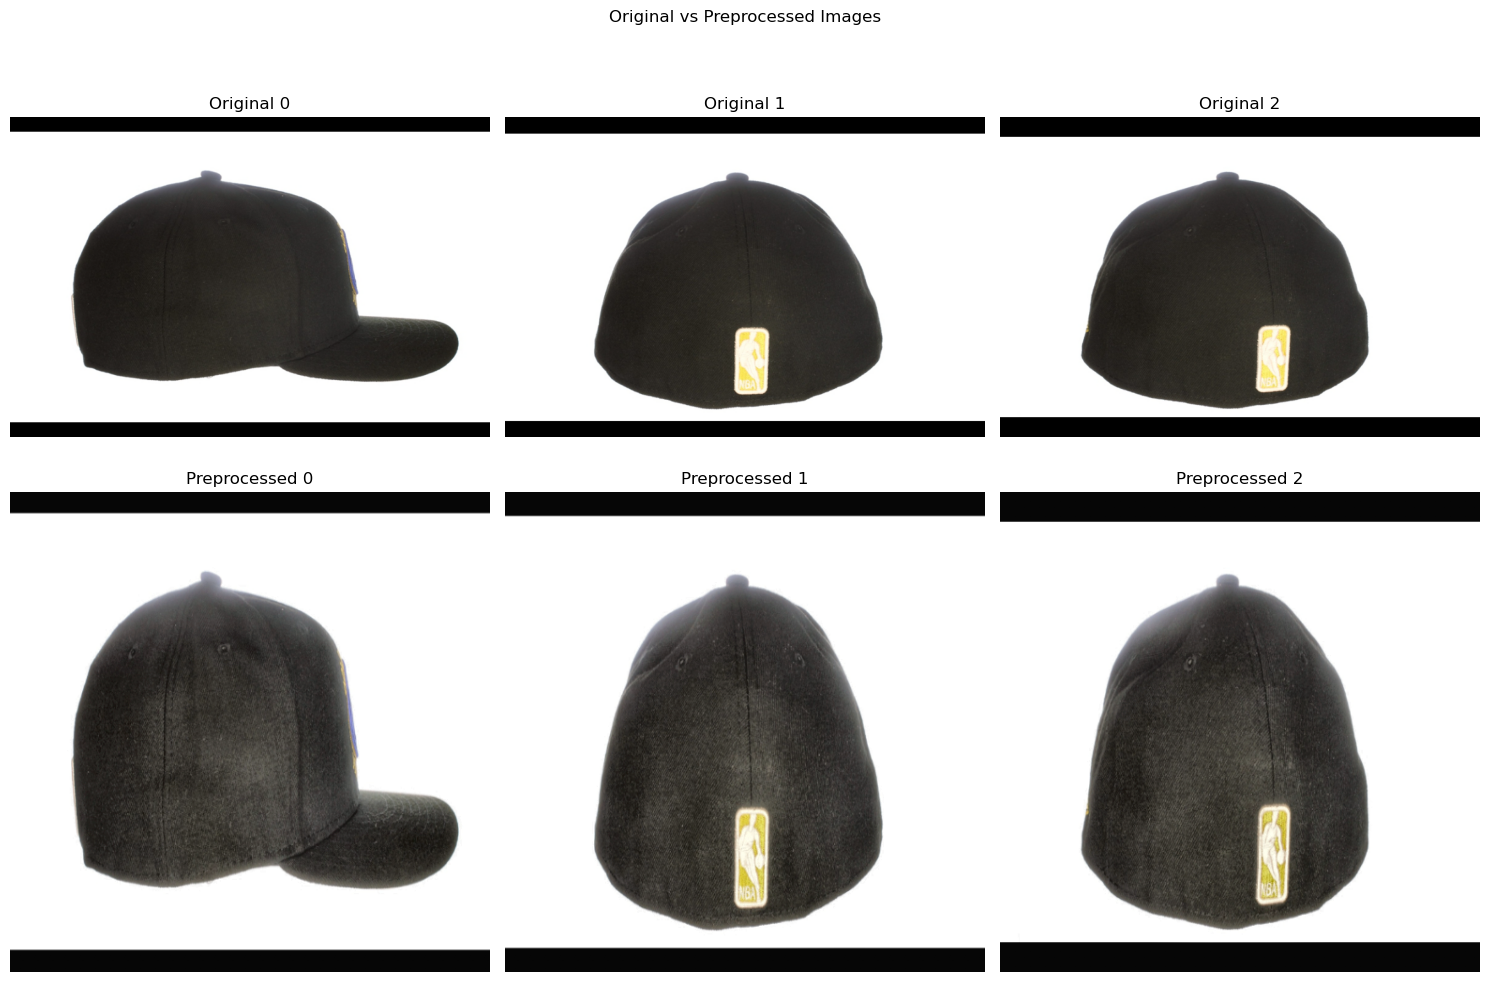

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Original vs Preprocessed Images")

for i in range(3):
    axes[0, i].imshow(images[i])
    axes[0, i].set_title(f"Original {i}")
    axes[0, i].axis('off')
    
    axes[1, i].imshow(enhanced_images[i])
    axes[1, i].set_title(f"Preprocessed {i}")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()